In [1]:
import pandas as pd

def parse_score_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Find the header row (column names)
    header = None
    for line in lines:
        if line.startswith("SCORE: total_score"):
            header = line.strip().split()[1:]  # Skip "SCORE:" at the beginning
            break

    if not header:
        print("Header not found in file.")
        return None

    # Columns to extract (epr columns)
    epr_columns = [col for col in header if col.startswith("epr_")]

    # Prepare data extraction
    data = []
    descriptions = []

    # Extract relevant rows
    for line in lines:
        if line.startswith("SCORE:"):
            parts = line.strip().split()
            description = parts[-1]  # Last part is the description
            descriptions.append(description)

            # Get the epr values, with error handling for non-numeric values
            row = []
            for col in epr_columns:
                try:
                    value = float(parts[header.index(col) + 1])
                    row.append(value)
                except (ValueError, IndexError):
                    row.append(None)  # Append None for any missing or invalid values
            data.append(row)

    # Create DataFrame
    df = pd.DataFrame(data, columns=epr_columns)
    df.insert(0, "Description", descriptions)  # Insert description as the first column

    return df


# Load and parse the score file
file_path = 'ssm_scan.sc'  # Update with your file path
df = parse_score_file(file_path)

# Display the DataFrame or save to a CSV
print(df)
df.to_csv('epr_values_only.csv', index=False)


                               Description  epr_ala  epr_arg  epr_asn  \
0                              description      NaN      NaN      NaN   
1   relaxedSplit_Chains_pLSIL022_0001_120A   -2.664    1.135   -2.944   
2   relaxedSplit_Chains_pLSIL022_0001_121A   -4.269  125.155   60.074   
3   relaxedSplit_Chains_pLSIL022_0001_122A   -1.822   -0.874   -1.997   
4   relaxedSplit_Chains_pLSIL022_0001_123A   -1.261    1.613    0.524   
5   relaxedSplit_Chains_pLSIL022_0001_124A   -2.890   10.748   -3.564   
6   relaxedSplit_Chains_pLSIL022_0001_125A   -1.589   -1.718   -0.084   
7   relaxedSplit_Chains_pLSIL022_0001_126A   -0.365   -0.499   -0.695   
8   relaxedSplit_Chains_pLSIL022_0001_127A   -2.548   14.905   -2.850   
9   relaxedSplit_Chains_pLSIL022_0001_128A    7.803  265.829  201.676   
10  relaxedSplit_Chains_pLSIL022_0001_129A   -0.687    0.973   -1.700   
11  relaxedSplit_Chains_pLSIL022_0001_130A   -0.302    0.300   -0.421   
12  relaxedSplit_Chains_pLSIL022_0001_131A   -1.119

In [2]:
# Read the raw file and print a few lines to understand its structure
file_path = 'ssm_scan.sc'  # Update with the correct file path

with open(file_path, 'r') as file:
    lines = file.readlines()

# Display the first few lines of the file to inspect
print("First few lines of the raw score file:")
for line in lines[:10]:  # Print the first 10 lines
    print(line)


First few lines of the raw score file:
SEQUENCE: 

SCORE: total_score     ddg_ala     ddg_arg     ddg_asn     ddg_asp     ddg_cys     ddg_gln     ddg_glu     ddg_gly     ddg_his     ddg_ile     ddg_leu     ddg_lys     ddg_met     ddg_phe     ddg_pro     ddg_ser     ddg_thr     ddg_trp     ddg_tyr     ddg_val dslf_fa13   epr_ala   epr_arg   epr_asn   epr_asp   epr_cys   epr_gln   epr_glu   epr_gly   epr_his   epr_ile   epr_leu   epr_lys   epr_met   epr_phe   epr_pro   epr_ser   epr_thr   epr_trp   epr_tyr   epr_val    fa_atr    fa_dun   fa_elec fa_intra_rep fa_intra_sol_xover4              fa_rep              fa_sol hbond_bb_sc hbond_lr_bb    hbond_sc hbond_sr_bb lk_ball_wtd       omega     p_aa_pp pro_close rama_prepro         ref yhh_planarity description 

SCORE:    -533.467     -10.872      -8.271     -10.973      -9.854     -11.603     -10.835     -11.776      -9.477     -13.083     -14.640     -15.570      -6.860     -13.273      -7.408     -10.356      -9.866     -11.894      32.

In [3]:
import pandas as pd

def parse_score_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Find the header row and extract column names for epr columns
    header_index = None
    for i, line in enumerate(lines):
        if line.startswith("SCORE:"):
            header_index = i
            header = line.strip().split()
            break

    # Extract columns that contain epr scores
    epr_columns = [col for col in header if col.startswith("epr_")]
    all_columns = ["Description"] + epr_columns

    # Prepare data list
    data = []
    
    # Parse rows with score values
    for line in lines[header_index + 1:]:
        if line.startswith("SCORE:"):
            parts = line.strip().split()
            description = parts[-1]  # Assuming the last part is the description
            row = [description] + [float(parts[header.index(col)]) for col in epr_columns]
            data.append(row)

    # Create DataFrame
    df = pd.DataFrame(data, columns=all_columns)
    return df

# Parse the score file and inspect the DataFrame
df = parse_score_file(file_path)
print("Parsed DataFrame:")
print(df.head())


Parsed DataFrame:
                              Description  epr_ala  epr_arg  epr_asn  epr_asp  \
0  relaxedSplit_Chains_pLSIL022_0001_120A   -2.664    1.135   -2.944   -2.464   
1  relaxedSplit_Chains_pLSIL022_0001_121A   -4.269  125.155   60.074   43.273   
2  relaxedSplit_Chains_pLSIL022_0001_122A   -1.822   -0.874   -1.997   -0.721   
3  relaxedSplit_Chains_pLSIL022_0001_123A   -1.261    1.613    0.524   -3.436   
4  relaxedSplit_Chains_pLSIL022_0001_124A   -2.890   10.748   -3.564   -2.794   

   epr_cys  epr_gln  epr_glu  epr_gly  epr_his  ...  epr_leu  epr_lys  \
0   -0.768   -2.032   -2.609   -0.927   -1.147  ...   -2.132    3.249   
1   33.165  115.921  103.083   -1.620  422.200  ...  343.504  162.663   
2    0.521   -2.200   -2.491   -0.523   -1.100  ...   -1.424   -2.442   
3    0.414   -1.149   -2.382   -0.068   53.899  ...    0.377    0.857   
4   -1.411   -3.148   -3.113   -1.267   -0.862  ...   -5.618    3.726   

   epr_met  epr_phe  epr_pro  epr_ser  epr_thr  epr_trp 

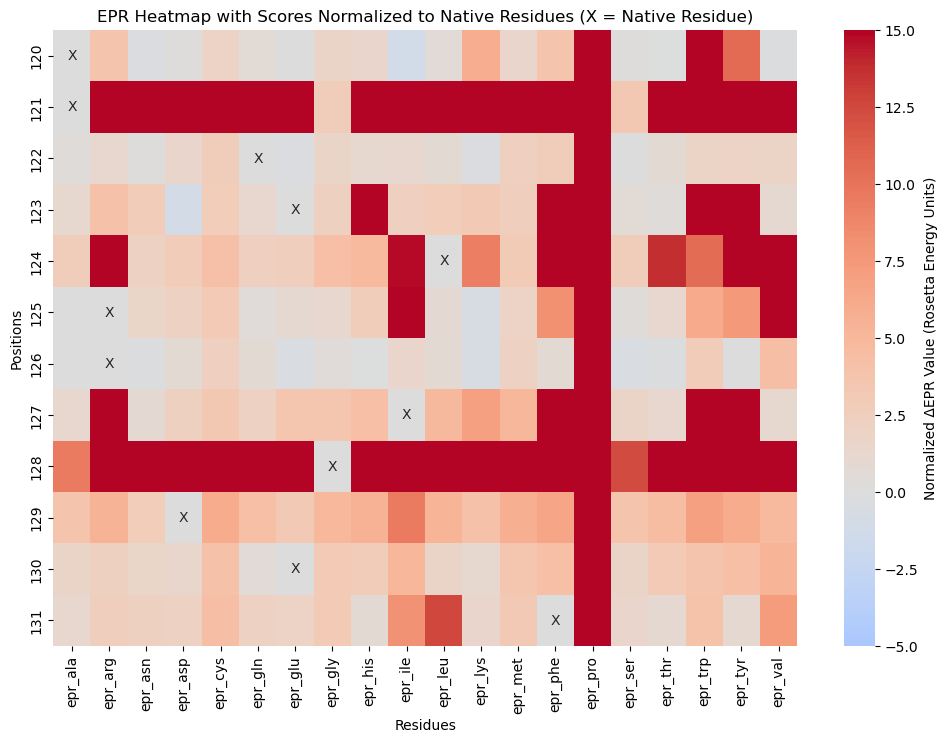

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the native residues for each position
native_residues = {
    "120A": "epr_ala",
    "121A": "epr_ala",
    "122A": "epr_gln",
    "123A": "epr_glu",
    "124A": "epr_leu",
    "125A": "epr_arg",
    "126A": "epr_arg",
    "127A": "epr_ile",
    "128A": "epr_gly",
    "129A": "epr_asp",
    "130A": "epr_glu",
    "131A": "epr_phe"
}

# Normalize each position by subtracting the score of the native residue for that position
for index, row in df.iterrows():
    position = row['Description'].split('_')[-1]
    native_residue = native_residues.get(position)
    
    if native_residue:
        native_value = row[native_residue]
        df.loc[index, df.columns[1:]] -= native_value

# Drop the 'Description' column to keep only numeric values for the heatmap
df_numeric = df.drop(columns=['Description'])

# Create an annotation matrix to indicate native residues
annotation_matrix = np.empty(df_numeric.shape, dtype=str)

# Populate the annotation matrix with 'X' for native residues
for index, row in df.iterrows():
    position = row['Description'].split('_')[-1]
    native_residue = native_residues.get(position)
    
    if native_residue:
        # Find the column index for the native residue in the DataFrame
        col_index = df_numeric.columns.get_loc(native_residue)
        annotation_matrix[index, col_index] = 'X'

# Extract positions from native_residues keys for y-axis labels
y_labels = [pos[:-1] for pos in native_residues.keys()]  # Remove the 'A' suffix

# Plot the heatmap with specified scale limits and annotations
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric, cmap="coolwarm", center=0, annot=annotation_matrix, fmt='', 
            vmin=-5, vmax=15, cbar_kws={'label': 'Normalized ΔEPR Value (Rosetta Energy Units)'}, 
            yticklabels=y_labels)
plt.title("EPR Heatmap with Scores Normalized to Native Residues (X = Native Residue)")
plt.xlabel("Residues")
plt.ylabel("Positions")
plt.show()
